# **自然言語・可視化・分析ライブラリ：csvデータ用**
表形式で整理されたアンケートの自由記述の分析を行うためのライブラリです。\
自然言語分析は、まず文書を語彙に分解し、その後 語彙数や語彙の出現傾向を可視化するなどして文書全体の訴えや傾向を把握します。\
このライブラリは、分析したい文書を保存した「csvファイル」を読込むだけで、自動で前処理、以下の可視化を行うライブラリです。

- **nlplot**（自然言語可視化・分析ライブラリ）：ワードカウントグラフや共起ネットワーク等の可視化や分析を行います。文書の語彙の特徴や傾向を掴むことができます。
- **Word Cloud**：出現頻度が高い語を複数選び出し、その頻度に応じた大きさで図示します。文書に含まれる語がどれだけ重要かを示すTF-IDFというベクトル計算を行った結果によるWord Cloudも図示します。（満足度別にも図示します）
- **センテンスのグループ分け①**：このライブラリは、User毎の自由記述の語彙傾向でグループ分けを行います。[ベクトル計算：TF-IDF⇒クラスタリング：k-means]
- **センテンスのグループ分け②**：Doc2Vecという文章をベクトル化する技術によるUser毎の自由記述のグループ分けを行います。[ベクトル計算：Doc2Vec⇒クラスタリング：k-means]

***
## **前準備**
1. **csvデータの表形式は以下としてください。**
- **カラム名は1列目を userID、2列目を comment（自由記述）、3列目を cs（満足度）としてください。3列目はなくても構いません。**
- [**注意**] csvデータは文字コードを「UTF-8」としてください。

|userID|comment|cs|
|---|---|---|
|U001  |総合的には満足してますが、○○が細かく調整できたらもっと使いやすいと思います。|4  |
|U002  |○○ボタンが押しにくいです。|2  |
|U003  |特にありません。|3  |
|U004  |既存品と取付位置が合わないことがつらいです。|1  |

2. [**このサイト**](https://yag-ays.github.io)から「dbow300d：distributed bag of words (PV-DBOW)」（学習済モデル）をダウンロード。
3. 解凍後、jawiki.doc2vec.dbow300d📂を/content/drive/My Drive/NLPに保存。
- [**注意**] 学習済モデルは、Google DriveのMy Driveの下にNLPフォルダに保存する設定としています。NLPフォルダは作成してください。
***
## **実行手順**
1. メニューバーの「ランタイム」から「すべてのセルを実行」をクリック。
2. ライブラリインストール完了後、[ファイル選択]ボタンをクリックし、分析したい文書（csvファイル）を指定する。
- [**注意**] テキストファイルは文字コードを「UTF-8」としてください。
3. Doc2Vecは、Google Driveに保存した学習済モデルをLoadします。初回実行時のみ表示されるURLをクリック⇒ログインし、表示されるコードをコピーし、セルに戻ってペーストする必要があります。
- [**注意**] Doc2Vecは処理に数分かかります。**時にクラッシュする**ことがあります。このような場合は**ランタイムを再起動してやり直し**てください。
***
## **このライブラリの使い方について**
- テキスト分析は文書量が多いと目を通すだけでも大変です。このライブラリで文書全体把握につながる語彙の特徴やセンテンスのグルーピングができますので、初手として活用することで効率化できます。
- Word Cloudで文書全体の訴えをながめた上、ライブラリが行ったグループ分け毎に個々のテキストに目を通すとよいと思います。
###**その他**
- グループ分けの数（クラスター数）は任意に設定できます。
- 満足度を数値化している場合、高い/低いランクを任意に設定できます。
- Word Cloudは、🍩型に変更することができます。
- [**注意**] k-means はアルゴリズム上、実行ごとに結果が変わることがあります。

# **ライブラリのインストール**

In [ ]:
pip install nlplot

     |████████████████████████████████| 967 kB 4.3 MB/s 
     |████████████████████████████████| 25.3 MB 1.9 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
#日本語フォントをインストール
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 3s (2,873 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ip

In [ ]:
#Mecabのインストール
!pip install mecab-python3==0.996.5

     |████████████████████████████████| 17.1 MB 387 kB/s 


In [ ]:
#matplotlib日本語化
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 4.1 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=d1651af901ab3fd3e595c1ff7b5f87f3d77a4d0c6f5ad1ea84083a8357476741
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [ ]:
from pathlib import Path
import pandas as pd
import re
import MeCab
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **ファイル & CS_High/Low_Level & ストップワード指定**
※CS_Level設定について
- **このレベル設定は、例えば6段階評価の場合、4以上を[満足]、3以下を[不満足]とする等のシキイの設定です。一部の可視化は、ここでの設定に沿った層別を行います。**

In [ ]:
#@title csvファイル（UTF-8）を指定してください
from google.colab import files
#print('csvファイル(UTF-8）を指定してください')
uploaded = files.upload()


Saving CS_text.csv to CS_text.csv


In [ ]:
#@title CS_High/Low設定（上：設定以上をCS高/下：設定以下をCS低） { run: "auto" }
CS_High_level_x_or_More = 4 #@param {type:"number"}
CS_Low__level_x_or_Less = 3 #@param {type:"number"}

In [ ]:
#@title ストップワード設定
stop_words = ["-", ".", ")", "(", "し", "い", "ある", "おる", "せる", "ない", "いる", "する", "の", "よう", "なる", "それ", "そこ", "これ", "こう", "ため", "そう", "れる", "られる"]

# **モジュール構築**

In [ ]:
#@title データフレーム格納＆欠損値削除
if len(uploaded.keys()) != 1:
    print("アップロードは１ファイルにのみ限ります")
else:
    target = list(uploaded.keys())[0]

df = pd.read_csv(target)

df.dropna(subset=['comment'], inplace=True)
df.head()

In [ ]:
#@title 形態素解析（一般名詞・動詞:基礎型・形容詞:基礎型）＆カンマ･スペース区切りをデータフレームに格納
#形態素解析（一般名詞・動詞・形容詞（動詞と形容詞は基礎型）を抽出対象とした）
#スペース区切り分かち書き
def mecab_analysis(text):

    t = MeCab.Tagger('-Ochasen')

    node = t.parseToNode(text)

    words = []
     
    while node:
        if node.surface != "":  # ヘッダとフッタを除外

            word_type = node.feature.split(',')[0]
            sub_type = node.feature.split(',')[1]
            features_ = node.feature.split(',')

            #品詞を選択
            if word_type in ["名詞"]: 
#                if sub_type in ['一般']:
                    word = node.surface
                    words.append(word)

            #動詞、形容詞[基礎型]を抽出（名詞のみを抽出したい場合は以下コードを除く）
            elif word_type in ['動詞','形容詞'] and not (features_[6] in stop_words):
                words.append(features_[6])

        node = node.next

        if node is None:
            break

    return " ".join(words)

#カンマ区切り分かち書き
def mecab_analysis2(text):

    t = MeCab.Tagger('-Ochasen')

    node = t.parseToNode(text)

    words2 = []

    while(node):

        if node.surface != "":  # ヘッダとフッタを除外
            word_type = node.feature.split(',')[0]
            sub_type = node.feature.split(',')[1]
            features_ = node.feature.split(',')

            if word_type in ['名詞']: #名詞をリストに追加する
#                if sub_type in ['一般']:
                    words2.append(node.surface)

            #動詞、形容詞[基礎型]を抽出（名詞のみを抽出したい場合は以下コードを除く）
            elif word_type in ['動詞','形容詞'] and not (features_[6] in stop_words):
                    words2.append(features_[6])

        node = node.next
        if node is None:
            break
    return words2

#形態素結果をリスト化し、データフレームdf1に結果を列追加する
df['words'] = df['comment'].apply(mecab_analysis)
df['words2'] = df['comment'].apply(mecab_analysis2)

#表示
df

In [ ]:
#@title 形態素結果を層別しデータフレームに格納
#全データをデータフレームに格納
all_words =' '.join(df['words'])
df_all = pd.Series(all_words)

#CSが高いuserの声（words）をデータフレームに格納
drop_index = df.index[df['cs'] <=CS_Low__level_x_or_Less]
#条件にマッチしたIndexを削除
df_high = df.drop(drop_index)
all_high_words=' '.join(df_high['words'])
df_all_high_words = pd.Series(all_high_words)

#CSが低いuserの声（words）をデータフレームに格納
drop_index2 = df.index[df['cs'] >=CS_High_level_x_or_More]
#条件にマッチしたIndexを削除
df_low = df.drop(drop_index2)
all_low_words=' '.join(df_low['words'])
df_all_low_words = pd.Series(all_low_words)

print('CS高ユーザーの声(Words）：')
print(df_all_high_words)
print('CS低ユーザーの声(Words）：')
print(df_all_low_words)

In [ ]:
#@title ワード出現回数カウント（表示する場合は#外す）
#カンマ区切り分かち書きしたワードをリスト化
words_list = df.words2.tolist()
words_list = sum(words_list,[])

from collections import Counter

#出現回数を集計し、最頻順にソートし、resultに格納
words_count = Counter(words_list)
result = words_count.most_common()

#出現回数結果を画面に出力
#for word, cnt in result:
#    print(word, cnt)

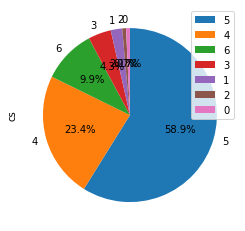

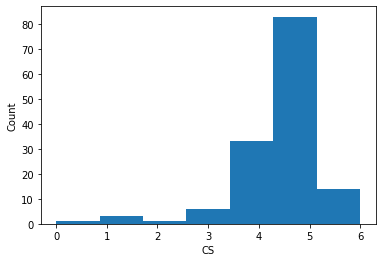

In [ ]:
#@title CS満足度傾向_円グラフ & ヒストグラム
cs = pd.DataFrame(df['cs'].value_counts())
cs.plot.pie(subplots=True,autopct="%1.1f%%",startangle=90,counterclock=False)
plt.show()

plt.hist(df['cs'],bins=7)
# x軸とy軸のラベルをつける
plt.xlabel('CS')
plt.ylabel('Count')
plt.show()

# **nlplot**
「nlplot」は、自然言語の可視化・分析できるライブラリです。
- N-gram bar chart, N-gram tree Map, Histogram of the word count, wordcloud, co-occurrence networks（共起ネットワーク）, sunburst chart（サンバースト）

In [ ]:
#@title uni-gram表示
import nlplot

npt = nlplot.NLPlot(df, target_col='words')

# top_nで頻出上位単語, min_freqで頻出下位単語を指定できる
#stopwords = npt.get_stopword(top_n=0, min_freq=0)

npt.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
#    stopwords=stopwords,
)

In [ ]:
#@title tree map表示
npt.treemap(
    title='Tree of Most Common Words',
    ngram=1,
    top_n=30,
#    stopwords=stopwords,
)

In [ ]:
#@title Word Cloud表示（nlpot）
npt.wordcloud(
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
#    stopwords=stopwords,
)

In [ ]:
#@title Word Distribution表示（単語数の分布）
# 単語数の分布
npt.word_distribution(
    title='number of words distribution',
    xaxis_label='count',
)

In [ ]:
#@title Build Graph（共起ネットワーク）表示
# ビルド（データ件数によっては処理に時間を要します）※ノードの数のみ変更
npt.build_graph(min_edge_frequency=1,
                #stopwords=stopwords,
                )

display(
    npt.node_df.head(), npt.node_df.shape,
    npt.edge_df.head(), npt.edge_df.shape
)

npt.co_network(
    title='Co-occurrence network',
)

In [ ]:
#@title Sunburst表示
npt.sunburst(
    title='All sentiment sunburst chart',
    colorscale=True,
    color_continuous_scale='Oryel',
    width=800,
    height=600,
    #save=True
)

# **Word Cloud**
- ワードクラウドは、文章中で出現頻度が高い語を複数選び出し、その頻度に応じた大きさで図示する手法。
- 表示するワードクラウドは全4種。①ワード出現回数ベース／②TF-IDFベース（全データ）/③TF-IDFベース（CS高データ）/④TF-IDFベース（CS低データ）\
※語の表示数はmax_words, Word Cloudの表示サイズはwidth, heightで設定できる

## **TF-IDF**
- TF-IDF は文書に含まれる単語がどれだけ重要かを示す手法の一つで、TF (= Term Frequency: 単語の出現頻度)と IDF (Inverse Document Frequency: 逆文書類度)の2つを使って計算します。

\begin{eqnarray} TF(d,w) &=& \frac{文書d における語wの出現回数}{文書d における全語の出現回数の和}\\ IDF(w) &=& log(\frac{全文書数}{語w を含む文書数})\\ TFIDF(d,w) &=& TF(d,w) \times IDF(w) \end{eqnarray}


In [ ]:
#@title TF-IDFマトリクス作成＆データフレーム格納
# ライブラリインポート
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDFのベクトル処理
vectorizer = TfidfVectorizer(use_idf=True)
tfidf = vectorizer.fit_transform(df['words'] )

# TF-IDF値を「センテンス×ワード」マトリクスをデータフレーム化
df_tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names(), index=df['words'])
#display(df_tfidf)

In [ ]:
#@title Word Cloud by word_count（All Data）：🔲型 → #maskの#外すと🍩型に

#wordcloud取込用にresultを辞書型ヘ変換
dic_result = dict(result)

#Word Cloudで画像生成（#max_words, width, heightは任意設定）
from wordcloud import WordCloud

#画像データダウンロード（biwakoの画像リンクもあり。変更する場合は#調整）
import requests

url = "https://github.com/hima2b4/Word-Cloud/raw/main/donuts.png"
#url = "https://github.com/hima2b4/Word-Cloud/raw/main/biwa.png"

file_name = "donuts.png"
#file_name = "biwa.png"

response = requests.get(url)
image = response.content

with open(file_name, "wb") as f:
    f.write(image)

#ライブラリインポート
from PIL import Image
import numpy as np

#Word Cloudで画像生成（#max_words, width, heightは任意設定）
custom_mask = np.array(Image.open('donuts.png'))
wordcloud = WordCloud(background_color='white',
                      max_words=125,
                      #mask=custom_mask,
                      font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
                      width=800,
                      height=500,
                      ).fit_words(dic_result)

#生成した画像の表示
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
#@title Word Cloud with TF-IDF（All DATA)：🔲型 → #maskの#外すと🍩型に
# TF-IDF計算
tfidf_vec2 = vectorizer.fit_transform(df_all).toarray()[0]
# TF-IDFを辞書化
tfidf_dict2 = dict(zip(vectorizer.get_feature_names(), tfidf_vec2))
# 値が正のkeyだけ残す
tfidf_dict2 = {k: v for k, v in tfidf_dict2.items() if v > 0}

#Word Cloudで画像生成（#max_words, width, heightは任意設定）
wordcloud = WordCloud(background_color='white',
                      max_words=125,
                      #mask=custom_mask,
                      font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
                      width=800,
                      height=500,
                      ).generate_from_frequencies(tfidf_dict2)

#生成した画像の表示
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
#@title Word Cloud with High CS Data (TF-IDF)：🔲型 → #maskの#外すと🍩型に
tfidf_vec = vectorizer.fit_transform(df_all_high_words).toarray()[0]
# TF-IDFを辞書化
tfidf_dict = dict(zip(vectorizer.get_feature_names(), tfidf_vec))
# 値が正のkeyだけ残す
tfidf_dict = {k: v for k, v in tfidf_dict.items() if v > 0}

#Word Cloudで画像生成（#max_words, width, heightは任意設定）
wordcloud = WordCloud(background_color='white',
                      max_words=125,
                      #mask=custom_mask,
                      font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
                      width=800,
                      height=500,
                      ).generate_from_frequencies(tfidf_dict)

#生成した画像の表示
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
#@title Word Cloud with Low CS Data (TF-IDF)：🔲型 → #maskの#外すと🍩型に
tfidf_vec = vectorizer.fit_transform(df_all_low_words).toarray()[0]
# TF-IDFを辞書化
tfidf_dict = dict(zip(vectorizer.get_feature_names(), tfidf_vec))
# 値が正のkeyだけ残す
tfidf_dict = {k: v for k, v in tfidf_dict.items() if v > 0}

#Word Cloudで画像生成（#max_words, width, heightは任意設定）
wordcloud = WordCloud(background_color='white',
                      max_words=125,
                      #mask=custom_mask,
                      font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
                      width=800,
                      height=500,
                      ).generate_from_frequencies(tfidf_dict)

#生成した画像の表示
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**クラスタリング（k-means法）について**\
数値化（TF-IDF）した各意見のクラスタリングを行います。クラスタリングは、scikit-learn の KMeans（非階層的クラスタ分析）を使用します。KMeans（非階層的クラスタリング）では、設定したクラスタ数にしたがって、近い属性のデータをグループ化します。\
参考として適性なクラスター数を導く手法（エルボー法）の結果を表示します。横軸：クラスタ数、縦軸：SSE（残差平方和）としたグラフで、クラスタ数を増やしてもSSEがほとんど改善しない点のクラスタ数を選ぶというものです。\
適切な点が見いだせない場合も含め、クラスター数は任意に設定できるようにしています。**「クラスター数設定」**で設定します。

In [ ]:
#@title 参考：k-means_クラスター数確認_エルボー法
from sklearn.cluster import KMeans
import japanize_matplotlib

'''
sse = []
for i  in range(1, len(df.index)):                
    km = KMeans(n_clusters=i,
                init='k-means++',     
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(tfidf)                         
    inertia_= np.round(km.inertia_,3) 
    sse.append(inertia_)  
    
plt.plot(range(1, len(df.index)),sse,marker='o')
plt.xlabel('クラスタ数')
plt.ylabel('誤差')
plt.show()
'''

"\nsse = []\nfor i  in range(1, len(df.index)):                \n    km = KMeans(n_clusters=i,\n                init='k-means++',     \n                n_init=10,\n                max_iter=300,\n                random_state=0)\n    km.fit(tfidf)                         \n    inertia_= np.round(km.inertia_,3) \n    sse.append(inertia_)  \n    \nplt.plot(range(1, len(df.index)),sse,marker='o')\nplt.xlabel('クラスタ数')\nplt.ylabel('誤差')\nplt.show()\n"

In [ ]:
#@title クラスター数設定 { run: "auto" }
num_clusters = 8 #@param {type:"number"}

In [ ]:
#@title TF-IDF_k-meansによる各意見のクラス分け
# kmean_clustring
from sklearn.cluster import KMeans

# クラスタ数8で実行
clusters = KMeans(n_clusters=num_clusters).fit_predict(tfidf)

#データフレームにclusterを反映
df['cluster_tfidf'] = clusters
df

# **Doc2Vec**

In [ ]:
#@title Doc2Vec 学習済モデル保存先指定
#GoogleDriveへのアクセス
from google.colab import drive
drive.mount('/content/drive')

#学習済モデル保存フォルダ指定
%cd /content/drive/My Drive/NLP

Mounted at /content/drive
/content/drive/My Drive/NLP


In [ ]:
#@title Doc2Vec ベクトル化

m = MeCab.Tagger("-Ochasen")

def mecab_sep(text):
    node = m.parseToNode(text)

    words_list = []

    while node:
        if node.feature.split(",")[0] == "名詞":
            words_list.append(node.surface)
        elif node.feature.split(",")[0] == "動詞":
            words_list.append(node.feature.split(",")[6])
        elif node.feature.split(",")[0] == "形容詞":
            words_list.append(node.feature.split(",")[6])
            
        node = node.next
        
    return words_list[1:-1]

### Bag-of-words / tf-idf
def calc_vecs(docs):
    vectorizer = TfidfVectorizer(analyzer=mecab_sep)
    vecs = vectorizer.fit_transform(docs)
    return vecs.toarray()

### Doc2Vec
from gensim.models.doc2vec import Doc2Vec
model = Doc2Vec.load("jawiki.doc2vec.dbow300d/jawiki.doc2vec.dbow300d.model")
def calc_vecs_d2v(docs):
    vecs = []
    for d in docs:
        vecs.append(model.infer_vector(mecab_sep(d)))
    return vecs

all_docs_vecs = calc_vecs_d2v(df['comment'])

In [ ]:
#@title Doc2Vec_k-meansによる各意見のクラス分け
from sklearn.cluster import KMeans

vec = KMeans(n_clusters=num_clusters)
vec.fit(all_docs_vecs)

df["cluster_d2v"] = vec.labels_
df

In [ ]:
#@title データフレームをcsvに変換し、ローカルファイルに保存
from google.colab import files
filename =  'cluster.csv'
df.to_csv(filename, encoding = 'utf-8-sig') 
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **参考サイト**
- [**【データ分析実践】口コミを使ったキャンプ場に関する分析3 ~ Word2Vec編 ~**](https://data-analytics.fun/2020/03/12/word2vec/)

- [**Janomeで TF-IDF をやってみた**](https://zenn.dev/megane_otoko/articles/013_tf_idf_trial)

- [**自然言語を簡単に可視化・分析できるライブラリ「nlplot」を公開**](https://www.takapy.work/entry/2020/05/17/192947)

- [**NLPLOTが凄い！自然言語を可視化・分析できるPYTHONライブラリ**](https://boxcode.jp/nlplot%E3%81%8C%E5%87%84%E3%81%84%EF%BC%81%E8%87%AA%E7%84%B6%E8%A8%80%E8%AA%9E%E3%82%92%E5%8F%AF%E8%A6%96%E5%8C%96%E3%83%BB%E5%88%86%E6%9E%90%E3%81%A7%E3%81%8D%E3%82%8Bpython%E3%83%A9%E3%82%A4)

- [**PYTHONで感情分析（形態素解析準備編）- MECAB**](https://boxcode.jp/python%e3%81%a7%e6%84%9f%e6%83%85%e5%88%86%e6%9e%90%ef%bc%88%e5%bd%a2%e6%85%8b%e7%b4%a0%e8%a7%a3%e6%9e%90%e6%ba%96%e5%82%99%e7%b7%a8%ef%bc%89-mecab)

- [**テキストをK-meansクラスタリングしてみよう**](https://www.youtube.com/watch?v=cU2RmYaR44I)